<a href="https://colab.research.google.com/github/victorsa42/Analise_de_dados_com_Python-/blob/main/Analise_Constante_de_mola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

links para entender melhor:
* https://www.youtube.com/watch?v=t1d0gZ99G_Y
* https://www.youtube.com/watch?v=tnhjAziFT-Q
* https://matplotlib.org/stable/gallery/index.html
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
from matplotlib.figure import Figure
from sklearn.metrics import r2_score
from scipy import stats



In [ ]:
# importar modulos
import matplotlib.pyplot as plt  #modulo grafico
import numpy as np  #modulo matematico
import pandas as pd #modulo para analise de dados
from scipy.optimize import curve_fit #biblioteca cientifica responsavel por fitar uma  curva 


In [ ]:

# importar google drive e autenticação
#from google.colab import drive,auth 
#drive.mount('/content/gdrive', force_remount = True )

# importar google planilhas (sheet)
from google.colab import auth
auth.authenticate_user()
import gspread  # modulo do google sheet
from oauth2client.client import GoogleCredentials  #credenciais do google

## autenticação do modulo gspread
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
# abrir o arquivo do sheet pelo nome
wb = gc.open('p1')
wb

### abrir pelo link
# wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1y8Yl6hQ9dwVGj_ouwqjKYWyssjSNir0b2EFQCVLHxh0/edit#gid=0')

sheet1 = wb.worksheet('Sheet1')
#sheet1.get_all_values()  ###pega todos os valores 
dados = sheet1.get_all_records()  ###pega todos os valores sendo a primeira linha o titulo

df = pd.DataFrame(dados)
df

,mm,M,m,T1,T2,T3,m1,m2,m3
0,5.0,315,0.315,0.57,0.65,0.81,0.3167,0.3478,0.390
1,98.5,415,0.415,0.61,0.68,0.84,0.4167,0.4478,0.490
2,225.0,509,0.509,0.64,0.73,0.88,0.5107,0.5418,0.584


In [ ]:
# equção a ser usada no ajuste da curva
def func(x, k):
    return np.sqrt(x/k)

def func2(x2, k2):
  return np.sqrt(x2/k2)

def func3(x3, k3):
  return np.sqrt(x3/k3)


In [ ]:
#x = np.array([1, 2, 2.5, 6, 7.8, 9.6])
# x= np.linspace(1,7,50)



[1.12699936]
[0.07875322]
[0.94508372]
[0.6869634]
-0.08250120080293932
0.1836728054028568


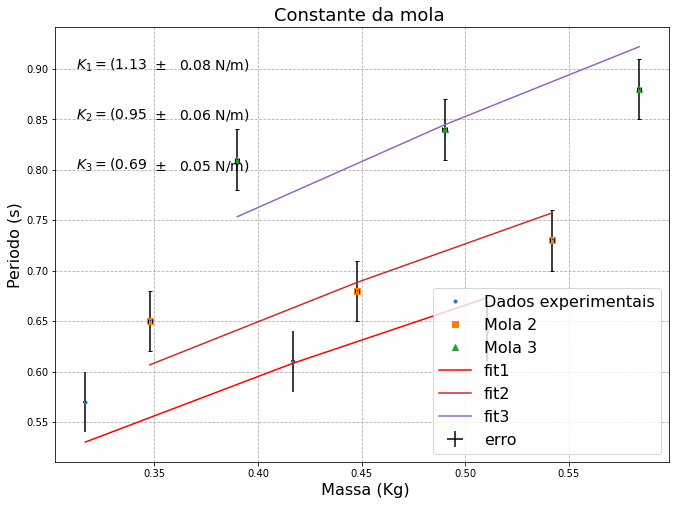

In [ ]:
#criar uma figura que sera o grafico
fig, ax = plt.subplots(figsize =(11,8))
nomefig = 'Graficop1.png'


#valores dos eixos referentes as colunas da tabela 
x = np.array(df['m1'])
y = np.array(df['T1'])

x2 = np.array(df['m2'])
y2= np.array(df['T2'])

x3 = np.array(df['m3'])
y3 = np.array(df['T3'])


#xr=np.array(df['erro Vm1C(mm/s)'])
xr=1/1000
yr=0.03


#ajuste
popt, pcov = curve_fit(func, x , y)
popt2, pcov2 = curve_fit(func2, x2 , y2)
popt3, pcov3 = curve_fit(func3, x3 , y3) 
erroV = np.sqrt(np.diag(pcov)) #erro das variaveis obtidas pelo ajuste 
print(popt)
print(erroV)
erroV2 = np.sqrt(np.diag(pcov2))
erroV3 = np.sqrt(np.diag(pcov3))
print(popt2)
print(popt3)


# plotar o grafico
plt.plot(x ,y , marker = '.', label="Dados experimentais", ls = '', lw = '1')
plt.plot(x2 ,y2 ,marker='s', label="Mola 2", ls = '', lw = '1')
plt.plot(x3 ,y3 , marker='^', label="Mola 3", ls = '', lw = '1')


# plot do ajuste
plt.plot(x, func(x, *popt), 'r-', label='fit1')  #m_sc_s(T_2-T_1)+
plt.plot(x2, func(x2, *popt2),  label='fit2')
plt.plot(x3, func3(x3, *popt3), label='fit3')

 
#barra de erro
ax.errorbar(x,y, xerr=xr, yerr=yr, fmt=",", color="b", label='erro', capsize=0 ,ecolor='k')
ax.errorbar(x2,y2, xerr=xr, yerr=yr, fmt=",", color="b",  capsize=2 ,ecolor='k')
ax.errorbar(x3,y3, xerr=xr, yerr=yr, fmt=",", color="b",  capsize=2 ,ecolor='k')


#configurações do grafico
ax.set_title('Constante da mola ', fontsize = 18) #titulo
ax.set_xlabel(' Massa (Kg)' , fontsize = 16 ) #nome do eixo x
ax.set_ylabel('Periodo (s)' , fontsize = 16 ) #nome do eixo y
ax.grid(ls= '--') #grid no grafico
ax.legend(loc="best",fontsize = 16,fancybox=True) #legenda do grafico
#plt.ylim((0,650))


#calculo e texto do R^2
modelPredictions = func(x, *popt) 
absError = modelPredictions - y
r_squared = 1.0 - (np.var(absError) / np.var(y))
print(r_squared)

modelPredictions = func2(x2, *popt2) 
absError2 = modelPredictions - y2
r_squared2 = 1.0 - (np.var(absError2) / np.var(y2))
print(r_squared2)

ax.text(0.31 ,0.9 , r' $K_1= (%2.2f $'  % tuple(popt), fontsize=14,) #caixa de texto
ax.text(0.35, 0.9, r'$\pm$   %1.2f N/m)'  % tuple(erroV), fontsize=14,) #caixa de texto
#ax.text(0.3, 0.85, r'$R^2$ = %0.3f' % r_squared, fontsize=14, bbox={'facecolor': 'black', 'alpha': 0.2, 'pad': 5}) #caixa de texto

ax.text(0.31 ,0.85 , r' $K_2=(%2.2f $'  % tuple(popt2), fontsize=14,) #caixa de texto
ax.text(0.35, 0.85, r'$\pm$   %1.2f N/m)'  % tuple(erroV2), fontsize=14,) #caixa de texto

ax.text(0.31 ,0.8 , r' $K_3= (%2.2f $'  % tuple(popt3), fontsize=14,) #caixa de texto
ax.text(0.35, 0.8, r'$\pm$   %1.2f N/m)'  % tuple(erroV3), fontsize=14,) #caixa de texto


## salvar figura
fig.savefig(nomefig)
plt.show()

# Nova seção